In [6]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline

In [7]:
N=50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x=numpy.linspace(x_start, x_end, num=N)
y=numpy.linspace(y_start, y_end, num=N)
X, Y = numpy.meshgrid(x, y)

In [8]:
# create the vortex
gamma = 5.0
x_vortex, y_vortex = 0.0, 0.0 #location of the vortex

def get_velocity_vortex(strength, xv, yv, X, Y):
    
    u=strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v=-strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u,v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    
    psi=strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi

In [9]:
# find the velocity feild of the vortex
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# find the stream function of the vortex
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

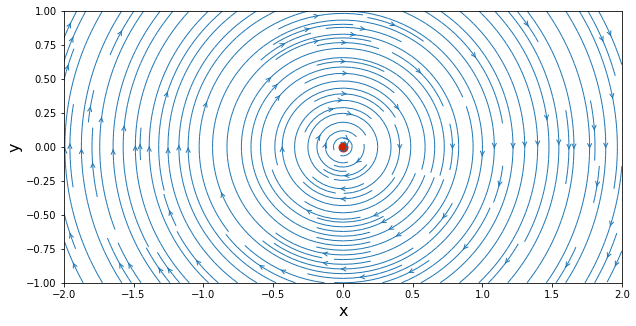

In [13]:
# plot the streamlines
width = 10
height=(y_end-y_start)/(x_end-x_start)*width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex, v_vortex, density=2, linewidth=1, arrowsize=1, arrowstyle='->');
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');


Using superposition to add a vortex and a sink!

In [15]:
# define the source and sink
strength_sink = -1.0
x_sink, y_sink = 0.0, 0.0

# Create the functions for the source and sink
def get_velocity_sink(strength, xs, ys, X, Y):
    u=strength/(2*math.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v=strength/(2*math.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u, v

def get_stream_function_sink(strength, xs, ys, X, Y):
    psi = strength/(2*math.pi)*numpy.arctan2((Y-ys), (X-xs))
    return psi

In [16]:
# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the mesh grid
psi_sink = get_stream_function_sink(strength_sink, x_sink, y_sink, X, Y)

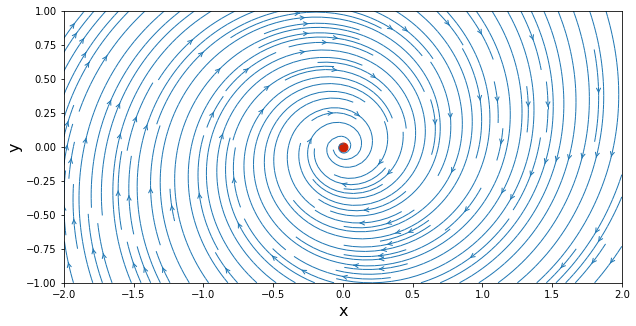

In [18]:
u=u_vortex+u_sink
v=v_vortex+v_sink
psi=psi_vortex+psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

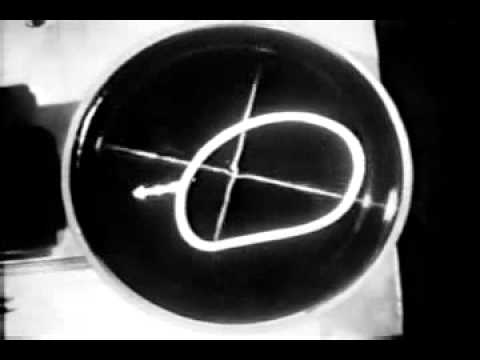

In [19]:
from IPython.display import YouTubeVideo
from datetime import timedelta

start=int(timedelta(hours=0, minutes=4, seconds=25).total_seconds())

YouTubeVideo("loCLkcYEWD4", start=start)